In [ ]:
!pip install tensorflow-gpu


     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 39.3 MB/s 


In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Part 2 - Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [12]:
classifier.add(Dropout(0.30))

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=10,activation='relu'))

In [14]:
classifier.add(Dropout(0.30))

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [17]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

In [22]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50, callbacks=[callback])

Epoch 1/50
536/536 [==============================] - 2s 3ms/step - loss: 0.3788 - accuracy: 0.8431 - val_loss: 0.3699 - val_accuracy: 0.8501
Epoch 2/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8377 - val_loss: 0.3698 - val_accuracy: 0.8504
Epoch 3/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3889 - accuracy: 0.8354 - val_loss: 0.3750 - val_accuracy: 0.8459
Epoch 4/50
536/536 [==============================] - 1s 3ms/step - loss: 0.3812 - accuracy: 0.8371 - val_loss: 0.3771 - val_accuracy: 0.8504
Epoch 4: early stopping


In [23]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


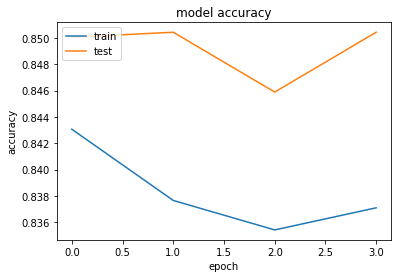

In [24]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

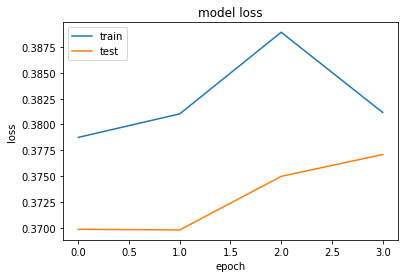

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   70],
       [ 207,  198]])

In [28]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [29]:
score

0.8615